<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/main/notebooks/Python_chapter7_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最適化問題の基礎


[この章の目的]
最適化問題のイメージを掴み、一次元の単峰的な関数の最小値を探索できるようになる。

種々のデータ解析や学術的分野での計算をはじめ世の中の多くの問題は**最適化問題**に帰着される.  
最適化問題とは、大雑把に言えば「ある量の最小値/最大値とそれを与える変数/パラメータの値を知ること」と言い換えられる. 

「人生も、何らかの目的関数$f(x)$(一般に$x$は多次元),たとえば幸福感(不幸感)を最大化(最小化)すること  
という意味では、最適化問題を考えていることに相当する」というと少し大げさでしょうか。


この章では、最適化の基礎について学んでいくことにしよう。  
授業では実際に最適化で必要な数学的な操作をするコードを作ったりする訳ではないが  
「ライブラリに入れてポンッ」ではなく、背後にあるモチベーションや概念を理解しておくことは  
自分が興味のある問題を最適化問題に帰着させて解くためには不可欠だ。

※高校で微分を勉強していないという方に向けて末尾に数学的準備の項を設けてあるのでチェックしてください.  
(よく知っているという方もさっと目を通してみてください)  




## 考えたい問題のイメージ

以下で考えたい問題のポンチ絵

<img src="https://drive.google.com/uc?export=view&id=1dvnzljSpB7ht4RDr8WXTP8kH9KCMBCBA" width=70%>


> あなたは変数$x$のある特定の点$t$での関数値$f(t)$を観測して知っている。  
> また、図中に**緑の線で示したような$f(x)$の振る舞いを予め知ることはできず  
> 都度$x$を変えて調べることで初めて対応する$y$の値が分かる**状況を考えよう。  
> (そのことを点線で表現しています)  
> このとき、$x$を変えながら$f(x)$が最小となる点を探すには一般にどうすればよいだろうか？



変数が2次元(やそれ以上)の場合も、  
(実際上の難しさが違うとはいえ)基本的なアイデアは同様なので、  
以下では１次元の場合のみ扱うことにする.

<img src="https://drive.google.com/uc?export=view&id=1PGkcncbgSOQpG_mGyqV58d2FvMdJeI7K" width=60%>



---



さて、1次元の場合に話を戻して...(図を再掲)

<img src="https://drive.google.com/uc?export=view&id=1dvnzljSpB7ht4RDr8WXTP8kH9KCMBCBA" width=60%>

$x$の値を$t$から更新していく方法として、色んな方法が考えられる。たとえば...

1. ランダムに探索する(例:サイコロを振って、目が1-3なら$x$を適当な値だけ減らし出目が4-6なら$x$を増やしていく)
2.  xを適当な区間に分割(10等分,100等分, etc.)その点で値を調べる

などが考えられる。

ただし$x$が薬品の濃度で$f(x)$が薬品の副作用だとしたとき(※)には、  
$x$を変えて$f(x)$の値を調べると言っても限界がある。

※「1変数の関数であるはずがない」ことは一旦忘れることにして、イメージしやすいようこの例にした

1.の方法では、**同じところを何度か行き来するので明らかに無駄が多い**し、   
2.の方法では**分割が少なすぎると十分な精度で最適解が見つからない**  
**かといって分割が多すぎるとコストがかさむ**。

したがって、**できるだけ少ない試行回数で最適な値を見つける効率のよい探索方法**が必要となる。  
そこで重要なのが、$x$を変えたときに関数$f(x)$がどのように変化するか、つまり微分(勾配)の情報である。

**注意**  
そもそも$f(x)$の式の形がわかっていて$f'(x)=0$となる(つまり極値を持つ)$x$の値が計算できるのなら  
わざわざ$x$を更新するなどという手続きは必要ない。   
一般の問題では、関数やその勾配がそもそも書き下せなかったり  
極値を与える$x$($f'(x)=0$の解)を解析的に解けなかったりする。  
そんなときは以下で考えるような、$x$を更新した探索が必要となる。





## 最も基本的な最適化手法: 勾配法

*以下では、微分の値のことを指して[勾配]と呼ぶことにする.

さて、上の一次元の例をもっと簡略化することにして、単峰的(つまり１つしか谷が無い)場合を考えてみよう。
<img src="https://drive.google.com/uc?export=view&id=1VKl4CFinx5nr0sG0pqOpbfiZR48WLaUE" width=65%>

この様な場合、斜面の傾きに沿ってパラメータを更新していけばいずれ$f(x)$の最小値が見つかりそうだ。  
点$x=t$での勾配は(あえて)偏微分で書くと$\frac{\partial f(x)}{\partial x}|_{x=t}$となる。

$x$の値を更新する際に、更新前の値を$x_{old}$,更新後の値を$x_{new}$と書くことにすると、  
$x_{new} = x_{old} -\eta \frac{\partial f(x)}{\partial x}|_{x=x_{old}}$ と更新する。

>注) $\frac{\partial f}{\partial x}|_{x=t}$という表記に慣れていない方は、$f'(x=t)$のことと思って頂いて結構です



微分(傾き)が正の場合は、$x$を正に増やすと$f(x)$の値が増える  
微分(傾き)が負の場合は、$x$を正に増やすと$f(x)$の値が減る  
ことから、微分の値の前にマイナスがついている理由も納得できるかと思います。

最小化でなく最大化を考える場合はマイナス符号は不要で`+`となる。  
(上と同じように考えてみましょう)

上では、$\eta$という係数(正の値)を導入したが、  
これは**傾いてる方向にどれくらいのスケールで$x$を更新するか**をコントロールするパラメータで、  
機械学習などの分野で[学習率]と呼ばれるものに対応している。  
今の単峰的な関数の場合、学習率$\eta$は適当な値をひとつ選べば十分。






ただし、上の$\eta$が大きすぎたり小さすぎたりすると、なかなか効率的に$f(x)$の最適解を見つけられないことがある。

$\eta$が大きすぎると$x$の更新幅が大きすぎて谷をまたいでしまい、なかなか谷の底に落ち込まない、といったことが起こりえる.

<img src="https://drive.google.com/uc?export=view&id=1f1t1Bvs9NgHn5Fp1k84Ihs7F7SedM5OU" width = 65%>


一方で$\eta$が小さすぎると、なかなか更新が進まず  
これまた効率の悪い探索となってしまう。

<img src="https://drive.google.com/uc?export=view&id=1ChsZeoNFnHHuZKsATDvS2q6KITmgjoaS" width = 65%>


これ以外にも、最初の図のように多峰的(山あり谷あり)な関数だと、  
$\eta$が小さいと局所的な谷に捕まってしまってなかなか大局的な谷にたどり着けない、  
かといって$\eta$が大きすぎるとあらぬ方向に飛んでいってしまう、といったことが起こりえる。

その様な場合にはもう少し"賢い"最適化の手法を応用したり、更新の幅を徐々に減衰させるなどの工夫が必要になる。

### $\clubsuit$その他の最適化手法

勾配法の他にもたくさん問題に応じて最適化手法が用いられる。  
最適化を詳しくやろうとするとそれだけで半期の授業じゃ足りないくらいなので  
興味がある方は下記のキーワードなどで調べてみよう。

たとえば機械学習では、勾配の情報だけでなくそれまでの更新の履歴を活用した各種の最適化手法がよく用いられる。  
c.f. AdaGrad, Adam, etc.

また、物理学から着想を得た最適化手法もよく用いられる  
c.f. 焼きなまし法(Simulated Annealing)

最適化の手法自体に(広義の)機械学習の手法を使うこともあります  
c.f. ベイズ最適化(授業でも紹介します)

### $\clubsuit$目的関数の選択

最適化問題を解く場合に最小化/最大化したい関数のことを目的関数と呼ぶ。

データ分析をする上で最もよく出てくる目的関数はカイ自乗(chi-square)で  
例えば回帰の場合、予測$y_i$と観測値$f(x_i)$との間の二乗誤差  
$\chi^2 = \sum_i (y_i-f(x_i))^2$といったように定義される。  
(データの数で割ったり平方根を取った値を採用することもある)

機械学習の文脈では「予測の誤差(損失)を最小化したい」というモチベーションがあり  
目的関数を損失関数/Loss functionなどと言ったりもする。


目的関数の選び方は問題によってまちまちで  
その選び方によって"最適なモデル"も変わり得る、ということに注意しておこう。

たとえば、二乗誤差を考える際「正解が10のところを20と予測した場合」と  
「正解が1000のところを1010と予測した場合」とで二乗誤差の値自体は同じだが、  
データの数値に対する誤差が占める割合に着目すれば  
前者は2倍(100%)ずれていて、後者は1%しかずれていない。

このようにスケールの異なる量が出てくる状況下では  
目的関数(誤差関数, 損失関数, etc.)の定義で対数を取ったりする場合もある。


### 簡単な例でのプログラム

下に凸な二次関数の最小値を、勾配降下法で求めてみよう. もちろん二次関数の場合は、極値を与える$x$の値は、  
プログラムを書くまでもなく平方完成で求められるが、目的は数値計算になれるためなので気にしないことにする。

$f(x)=5x^2 -4x + 3$とでもしましょう。  
$x$についての微分はもちろん$\frac{df(x)}{dx}=10x -4$になる。

In [ ]:
def f(x):
    return 5.0 * x**2 - 4.0 * x  + 3.0
def dfdx(x):
    return 10.0 * x -4.0

はじめに$x=3.0$にいるとして、$\eta=0.2,0.05,0.01,0.001$の4通りについて   
勾配降下法でパラメータを100回更新してみる。



In [ ]:
step = 100
etas = [0.2, 5.e-2, 1.e-2, 1.e-3]
x_and_f = [ [] for i in range(len(etas))]
for i in range(len(etas)): 
    x = 3.0 #初期値
    x_and_f[i] += [ [ x, f(x) ] ] #結果をリストに格納
    for tstep in range(step): # step回だけ更新を繰り返す
        x = x - etas[i] * dfdx(x) # xnew = xold - eta * dfdx(at xold)になっている
        x_and_f[i] += [ [ x, f(x) ] ] #結果をリストに格納

アニメーションで見てみると... (少し実行に時間がかかります)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
cols = ["blue","green","orange","purple"]
x = np.linspace(-6, 6, 100);y = f(x)

fig_scatter = plt.figure(figsize=(10,5))
plt.xlim(-4,4);plt.ylim(0,40)
plt.plot(x,y)
plt_scatter = []
for nth in range(len(x_and_f[i])):
    plot_obj = []
    for i, eta in enumerate(etas): 
        if nth == 0 :
            tl = "eta="+str(eta)
        else :
            tl = ""
        plot_obj += [plt.scatter(x_and_f[i][nth][0],x_and_f[i][nth][1], c=cols[i],label=tl,alpha=0.7)]
    plt_scatter.append(plot_obj)
plt.legend()
plt.close()

animation.ArtistAnimation(fig_scatter, plt_scatter, interval=100)


グラフが描画できたら、再生ボタンを押してみてください

青($\eta=0.2$)は$\eta$が大きすぎて、谷を行ったり来たりしていることが分かる。  
一方で紫($\eta=0.001$)は小さすぎて、なかなか最適解にたどり着かない。

一般に考えたい関数に関して適切な$\eta$を前もって知ることはできず、  
関数*の振る舞いを見ながら試行錯誤することが必要になる。

*最適化したい量(損失関数と呼ぶ)の振る舞い

## 勾配の計算について



###  解析的に微分が計算できる場合


たとえば以下の例のように  
例1: $f(x)= \sum^p_{i=0} a_i x^i$ (多項式)  
例2: $f(x)= \exp{(-ax^2+bx+c)}$ (指数関数)  
例3: $f(x)= \ln{x}$ (自然対数)  

* $f(x)$が閉じた形で書き下せる
* 興味のある区間(定義域)で微分形が計算でき、有限の値を持つ場合

$x$をその微分した表式に代入することで勾配法の実装が可能となる.  
([有限の値をもつ場合]と限定したのは、微分が発散してしまうとパラメータの更新には実用上意味をなさないため)

ちなみに導関数$f'(x)=0$の解(根)が手で計算できるなら数値計算する必要がないし、  
根を求めたいだけなら、勾配法を使う理由は(アルゴリズムの理解等の目的を除いて)特に必要ない。

※最も単純な求根アルゴリズムであるニュートン法についての説明についてはおまけのニュートン法の章に記載がある。

大量の関数を考えて微分した表式が必要な場合は、  
いちいち関数の微分形を導出してコードにするのは面倒なので、  
SympyなどのモジュールやMathematicaなどのツールを使うのも一つの手です.

### 数値的に勾配を計算する場合

$f(x)$が具体的な$x$の形で書き下せない場合もある.

たとえば「$f(x)$が条件$x$のもとで行った何らかの測定結果である場合」などがこれにあてはまる。

より具体的な例をあげるなら、
あなたはとある医療薬品の効果(数値で表現できると仮定)を調べる研究をしているとして、  
温度$x$を変えながら何回か測定して$f(x)$の値を得るような状況を想像してください.

このような場合、関数$f(x)$の具体的な表式がわからないので、勾配だって$x$に対する式として書き下すことはできない。

しかし、微分の定義に立ち返って考えてみると、  
$f(x=a)$の値と、$x=a$から微小量$\delta$だけ動かした場所での値$f(a+\delta)$  
がわかっていれば$f'(x=a)$を"近似的に"計算することができる。


ただし、$\delta$があまり小さくないと下の絵のように正しく勾配が計算できない一方で、$x$を調整する精度に限界があったり、勾配を計算する際のコンピュータの数値精度には限りがありますので、文字通りの意味で"無限に小さい"の$\delta$を考えることはできず、有限の小さな値で$\delta$を表現することになり、それにより数値計算に大きな誤差が紛れ込む危険性もある。

$x$を動かしたときの関数の変動度合いがものすごく大きい(たとえば係数がめちゃくちゃデカイ)と、数値微分の精度は$\delta$に対する依存性が強くなってしまう。

![](https://drive.google.com/uc?export=view&id=1lY6wW0T09Nh9LoNNYRKrykaKMMGOFkhV)   


解析的に微分ができる関数を使って、数値微分の簡単な例を示しておこう。

関数$f(x)= x^4 - 3x^3 + 2x - 1$を$x=5$で微分した値$f'(5)$は定義から277となるが、  
$x=5$から$\epsilon$だけずらした点での値を使って数値微分してみると




In [ ]:
def f(x):
    return x**4 - 3.0* x**3 + 2.0*x -1.0
def fp(x,eps):
    return (f(x+eps)-f(x))/eps
x=5
exact_fp = 277 
for p in [0,-1,-2,-4,-5,-10,-15]:
    eps = 10**p
    print("eps\t",str("%5.1e" % eps), "\tf'("+str(x)+")\t", str("%18.13f" % fp(x,eps) ),
          "\t diff.",str("%5.1e" % np.log10(abs(fp(x,eps)-exact_fp))))


eps	 1.0e+00 	f'(5)	  400.0000000000000 	 diff. 2.1e+00
eps	 1.0e-01 	f'(5)	  287.6709999999986 	 diff. 1.0e+00
eps	 1.0e-02 	f'(5)	  278.0517009999926 	 diff. 2.2e-02
eps	 1.0e-04 	f'(5)	  277.0105001695811 	 diff. -2.0e+00
eps	 1.0e-05 	f'(5)	  277.0010499943965 	 diff. -3.0e+00
eps	 1.0e-10 	f'(5)	  277.0002538454719 	 diff. -3.6e+00
eps	 1.0e-15 	f'(5)	  227.3736754432320 	 diff. 1.7e+00


となり, $\epsilon=0.01$程度では微分の値の誤差が1, $\epsilon=$ 1.e-5でも2桁程度の精度しかない。

一番小さい$\epsilon=$で精度が逆に悪くなっているのは、  
あまりに小さい$\epsilon$だと$f(x+\epsilon)-f(x)$という引き算部分で数値誤差が発生し、  
さらに分母の小さな$\epsilon$によってそれが増幅されるため。

進んだ注)  
中心差分という、分割する区間を中央をxに揃える方式だと、精度が若干改善される。  
このことは、テイラー展開から示すことができる[→参考](https://ja.wikipedia.org/wiki/有限差分)


In [ ]:
def fp2(x,eps):
    return (f(x+0.5*eps)-f(x-0.5*eps))/(eps)

print("分割する区間の中央をxに揃える方式")
for p in [0,-1,-2,-4,-5,-10,-15]:
    eps = 10**p
    print("eps\t", str("%5.1e" % eps), "\tf'("+str(x)+")\t",str("%18.13f" % fp2(x,eps) ),
          "\t diff.",str("%5.1e" % np.log10(abs(fp2(x,eps)-exact_fp))))

分割する区間の中央をxに揃える方式
eps	 1.0e+00 	f'(5)	  281.2500000000000 	 diff. 6.3e-01
eps	 1.0e-01 	f'(5)	  277.0424999999986 	 diff. -1.4e+00
eps	 1.0e-02 	f'(5)	  277.0004249999886 	 diff. -3.4e+00
eps	 1.0e-04 	f'(5)	  277.0000000424488 	 diff. -7.4e+00
eps	 1.0e-05 	f'(5)	  276.9999999827633 	 diff. -7.8e+00
eps	 1.0e-10 	f'(5)	  276.9991169770947 	 diff. -3.1e+00
eps	 1.0e-15 	f'(5)	  454.7473508864641 	 diff. 2.2e+00


## $\clubsuit$その他の話題

冒頭にも書いたとおり、我々の身の回りにある多くの問題は最適化問題に帰着される。

もう少し細かいことをいうと、今回考えたような連続的な変数に対して  
最大/最小値を探索することは連続最適化と呼ばれ  
離散的な変数を含む離散最適化/組み合わせ最適化とは区別される。

組合せ最適化には、巡回セールスマン問題やナップサック問題などが含まれる。

## 数学的準備: 微分

ある直線$y=ax+b$を考えたとき、直線の傾き$a$に着目すれば、  
$x$の増加分に対して$y$がどれだけ変化するかを知ることができる。

一方、実社会で扱うデータは、一般に直線よりも複雑な形をしていて、  
それを式で表現しようと思うと、様々な関数の形を考える必要がある。  
(たとえば何かの値の季節変動などをイメージしよう)

そこで、直線の場合の[傾き]を、直線以外の関数に"拡張"しようと考えるのは  
至って自然な発想といえる。それが**微分**の概念である.

微分(積分)の歴史は古く、人類史のどの時点でアイデアが確立したとするかは諸説あるが  
最も代表的なものは、17世紀にニュートンとライプニッツが確立したとする説で  
ニュートンは微分の概念を独自に定式化し、天体の軌道などを予測するなどの偉大な功績を残した.


以下の内容は、全学向けの授業ということもあって  
厳密性はかなり犠牲にして微分の概念を導入している  
(もちろん、大学の数学の教科書に載っている関数の連続性や微分の厳密な定義は非常に重要です).

時間があったら、ヨビノリたくみ氏の[「中学数学からはじめる微分積分」](https://youtu.be/4p1rwfXbCoY)を視聴していただけると、イメージがつくかと思います。

### 微分の基本的な考え方

定義: ある変数$x$について関数$f(x)$が与えられているとき、  
関数$f(x)$の$x=a$での微分を  
$f'(a)=\lim_{\delta \to 0} \frac{f(a+\delta)-f(a)}{\delta}$と定義する.  

ここで、$\lim_{\delta \to 0}$は0に限りなく近い(無限小)の$\delta$を考えることを意味する。  

つまり、関数をある点からちょこっとだけ動かしたときに、  
関数の値が変動する度合いがどれくらいかを表しています。  
上の定義は「無限小の幅で関数を直線で近似して傾きを計算している」とも言いかえられるでしょう。

**直線の例**  
$f(x) = ax + b $の$x=x_1$での微分値は定義に当てはめて計算すると  
$f'(x_1)= \lim_{\delta \to 0} \frac{f(x_1+\delta)-f(x_1)}{\delta}= \lim_{\delta \to 0} \frac{(a(x_1+\delta)+b)-(ax_1+b)}{\delta} = a $ となる。  
つまり微分の値は直線の傾きに対応していて、  
なおかつ微分の値はどこの場所($x$)で調べても定数$a$であることを意味している。


**二次関数(放物線)の例**  
$f(x) = ax^2 + bx +c $
の$x=x_1$での微分は、定義にならって計算すると
$f'(x_1) = 2ax_1+b$となる(確かめてみよう)  
一方で$f(x)$を平方完成すると$f(x)=a(x+\frac{b}{2a})^2 -\frac{b^2}{4a} +c$となり、  
$x=-b/(2a)$で傾きが0になる。  
つまりこの二次関数は$x=-b/(2a)$で極値($a>0$なら最小値, $a<0$なら最大値)を持つ。

微分が0というのは関数の形がそこで谷や峠になっていることを意味する。  
実際上の例でも微分の値は$x_1=-b/(2a)$のとき、値は0になっている.







a=2.0,b=4.0,c=5.0とでもして、図をかいてみよう

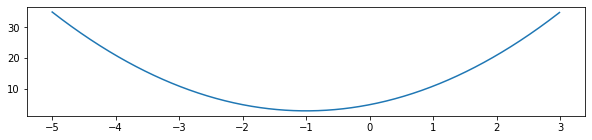

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
xr = np.arange(-5.0,3.0,0.01)
yr = 2.0 * xr**2 + 4.0 * xr + 5.0
fig = plt.figure(figsize=(10,2))
plt.plot(xr,yr)
plt.show()

確かに$x=-b/(2a)=-1.0$のところで極値(最小値)となっている。

微分の値もplotしてみると

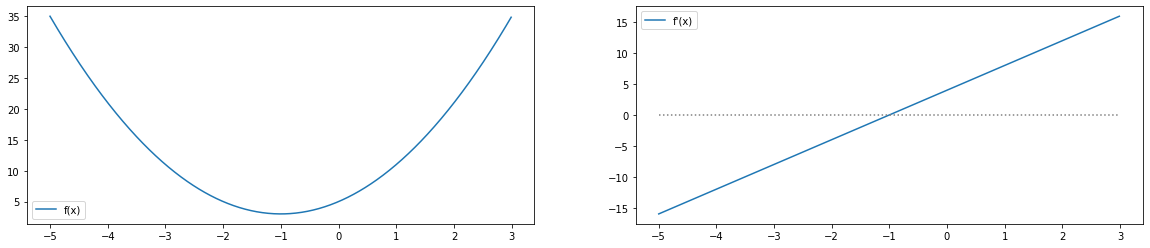

In [ ]:
xr = np.arange(-5.0,3.0,0.01)
yr = 2.0 * xr**2 + 4.0 * xr + 5.0
yp = 4.0 * xr + 4.0 
fig = plt.figure(figsize=(20,4))
axs = [fig.add_subplot(121),fig.add_subplot(122)]
axs[0].plot(xr,yr,label="f(x)"); axs[0].legend()
axs[1].plot(xr,yp,label="f'(x)");axs[1].plot([-5,3],[0,0],color="gray",linestyle="dotted");axs[1].legend()
plt.show();plt.close()

$x<-1$では$f'(x)<0$で、$x>-1$では$f'(x)>0$となっていますね。

これまでは、定義に即して微分の値を計算していましたが、毎回調べたい点で定義に立ち返るというのは面倒です。

関数が閉じた形で与えられているとき(つまり、$f(x)$が$x$の具体的な表式で与えられているとき)  
多くはその微分$f'(x)$も$x$の関数として書き下すことができます。  

そうすれば、$x$に特定の値を代入すれば好きな点での微分の値$f'(x)$を知ることができます。


とりあえずは以下を公式的に抑えておけば問題は有りません。

1. $x$の$x$に対する微分は1
2. $a x^p$の$x$に対する微分は$apx^{p-1}$ ($a$は非ゼロの定数)
3. $\exp{(x)}$(ネイピア数$e$の$x$乗)の$x$に対する微分は$\exp{(x)}$ 
4. $\cos{x}$の$x$に対する微分は$-\sin{x}$
5. $\sin{x}$の$x$に対する微分は$\cos{x}$
6. $\log{x}$の$x$に対する微分は$1/x$ (x>0で定義される)

いずれも、上の微分の定義や、指数関数/三角関数/対数関数の定義(c.f. マクローリン展開)から証明することができますので、興味があれば人生で一度はやってみてください。
